In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from IPython.display import display, clear_output
from sklearn.model_selection import KFold

In [73]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500
}

# Entscheidungsbaum
TREE_PARAMS = {
    "random_state" : 0,
    "max_depth": 15
}

In [85]:
len(m_heads + cats)

31

# Logistische Regression

In [86]:
data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

auc_temp = 0
heads_gain = []
drop = []

HEADS = m_heads + cats

for index, h in enumerate(HEADS):
    
    heads_gain.append(h)
    
    X = df[heads_gain + ["TARGET"]]
    X = X.fillna(0)
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    
    model = LogisticRegression(**LOG_PARAMS).fit(x, y)
    
    n = len(X)
    p = len(X.columns)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    # enumerate splits
    for i, (train, test) in enumerate(kfold.split(x)):

        model.fit(x.iloc[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)
    
    if auc_adj > auc_temp:
        
        data["auc"].append(auc)
        data["auc_adj"].append(auc_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        auc_temp = auc_adj
        
    else:
        heads_gain.remove(h)
        drop.append(h)
    
    clear_output(wait=True)
    print(index+1, len(HEADS), drop)

31 31 ['DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'ORGANIZATION_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'NAME_INCOME_TYPE', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT']


In [87]:
result = pd.DataFrame(data)

        auc   auc_adj  p       n
6  0.598004  0.597994  8  307511


<AxesSubplot:>

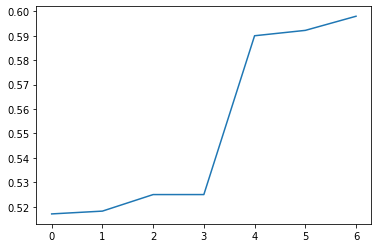

In [88]:
print(result[result["auc_adj"] == result["auc_adj"].max()])
result["auc_adj"].plot()

In [89]:
heads_gain

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH']

In [90]:
model = LogisticRegression(**LOG_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[heads_gain]

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    
    model.fit(x.iloc[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.6010034451842217
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.598063344366264
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.5939943194573152
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.6002542900007468
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.5967044309334815


Durchschnitt: 0.60
Standardabw.: 0.00
Varianz:      0.00


# Entscheidungsbaum

In [91]:
data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

auc_temp = 0
heads_gain = []
drop = []

HEADS = m_heads + cats

for index, h in enumerate(HEADS):
    
    heads_gain.append(h)
    
    X = df[heads_gain + ["TARGET"]]
    X = X.fillna(0)
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    
    model = DecisionTreeClassifier(**TREE_PARAMS).fit(x,y)
    
    n = len(X)
    p = len(X.columns)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    # enumerate splits
    for i, (train, test) in enumerate(kfold.split(x)):

        model.fit(x.iloc[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)
    
    if auc_adj > auc_temp:
        
        data["auc"].append(auc)
        data["auc_adj"].append(auc_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        auc_temp = auc_adj
        
    else:
        heads_gain.remove(h)
        drop.append(h)
    
    clear_output(wait=True)
    print(index+1, len(HEADS), drop)

31 31 ['REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'YEARS_BEGINEXPLUATATION_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'ORGANIZATION_TYPE', 'CODE_GENDER', 'FLAG_DOCUMENT_3', 'NAME_INCOME_TYPE', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'NAME_INCOME_TYPE']


In [92]:
result = pd.DataFrame(data)

         auc   auc_adj   p       n
16  0.662348  0.662328  18  307511


<AxesSubplot:>

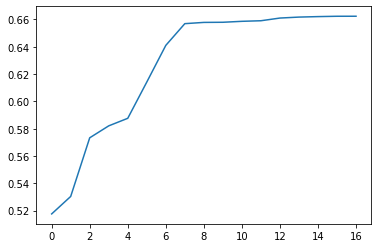

In [93]:
print(result[result["auc_adj"] == result["auc_adj"].max()])
result["auc_adj"].plot()

In [94]:
heads_gain

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TOTALAREA_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_EDUCATION_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT']

In [95]:
model = DecisionTreeClassifier(**TREE_PARAMS)


aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[heads_gain]

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    
    model.fit(x.iloc[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.6646387941502871
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.6632594225096033
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.6600518329992778
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.6571787847105486
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.6666119720568393


Durchschnitt: 0.66
Standardabw.: 0.00
Varianz:      0.00


# Random Forest

In [ ]:
data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

auc_temp = 0
heads_gain = []
drop = []
HEADS = m_heads + cats

for index, h in enumerate(HEADS):
    
    heads_gain.append(h)
    
    X = df[heads_gain + ["TARGET"]]
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    
    model = RandomForestClassifier(**TREE_PARAMS).fit(x,y)
    
    n = len(X)
    p = len(X.columns)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    # enumerate splits
    for i, (train, test) in enumerate(kfold.split(x)):

        model.fit(x.iloc[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)
    
    if auc_adj > auc_temp:
        
        data["auc"].append(auc)
        data["auc_adj"].append(auc_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        auc_temp = auc_adj
        
    else:
        heads_gain.remove(h)
        drop.append(h)
    
    clear_output(wait=True)
    print(index+1, len(HEADS), drop)

In [ ]:
result = pd.DataFrame(data)

In [ ]:
print(result[result["auc_adj"] == result["auc_adj"].max()])
result["auc_adj"].plot()

In [ ]:
heads_gain

In [ ]:
model = RandomForestClassifier(**TREE_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[heads_gain]

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    
    model.fit(x.iloc[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))